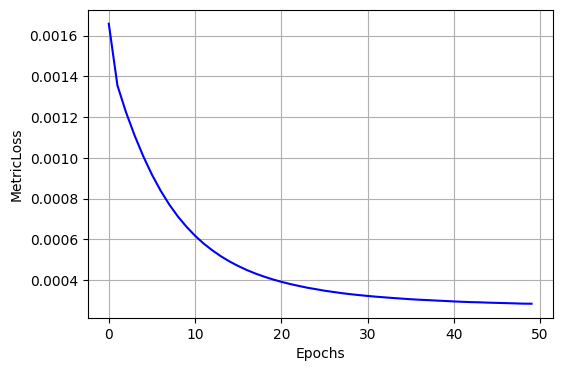

In [7]:
import os
import glob
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# ログファイルのパスを指定（ディレクトリ内の最新のイベントファイルを選択）
log_dir = "/mnt/log/test20250310-035346trial0"  # TensorBoard のログディレクトリを指定
log_file = sorted(glob.glob(os.path.join(log_dir, "events.out.tfevents.*")))[-1]

# EventAccumulator を使用してログデータを取得
event_acc = EventAccumulator(log_file, size_guidance={"scalars": 0})
event_acc.Reload()  # ログをロード

# 損失関数のスカラータグを取得（適宜変更）
loss_tag = "loss"  # TensorBoard で記録した損失関数のタグ

# 損失関数のデータを抽出
if loss_tag in event_acc.Tags()["scalars"]:
    loss_events = event_acc.Scalars(loss_tag)
    steps = [event.step for event in loss_events]
    values = [event.value for event in loss_events]

    # 損失関数の推移をプロット
    plt.figure(figsize=(6, 4))
    plt.plot(steps, values, label="Loss", color="b")
    plt.xlabel("Epochs")
    plt.ylabel("MetricLoss")
    # plt.title("MetricLoss")
    # plt.legend()
    plt.grid()
    plt.show()
else:
    print(f"Tag '{loss_tag}' not found in log file.")
